<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h2><center>Machine Learning : Assignment 2 </center></h2>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No : 090</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Sharath Vaidyanath</td>
    <td>2019HC04539</td>
  </tr>
  <tr>
    <td>Ramachandran N</td>
    <td>2019HC04537</td>
  </tr>
  <tr>
    <td>Hasthagiri Ganesh C V</td>
    <td>2019HC04323</td>
  </tr>
</table>

**Q1) ANN Model**

**1.Import the libraries and Load the dataset and Remove/replace missing values (if any)**

In [1]:
#Importing Standard libraries for analysis and visualizations 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the data into a dataframe
df = pd.read_csv(r"F:\M.tech\Study Materials\2nd Sem Materials\Machine Learning\Slides\Assignment - 2\Q1\advertising.csv")

In [3]:
#Reading the first five entries of the dataframe
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
#Reading the summary to get some insights about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
#Checking for any Null values present at the data
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

**There are no null values present at the data!!**

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


**Performing Explorataory data analysis on the dataset** 

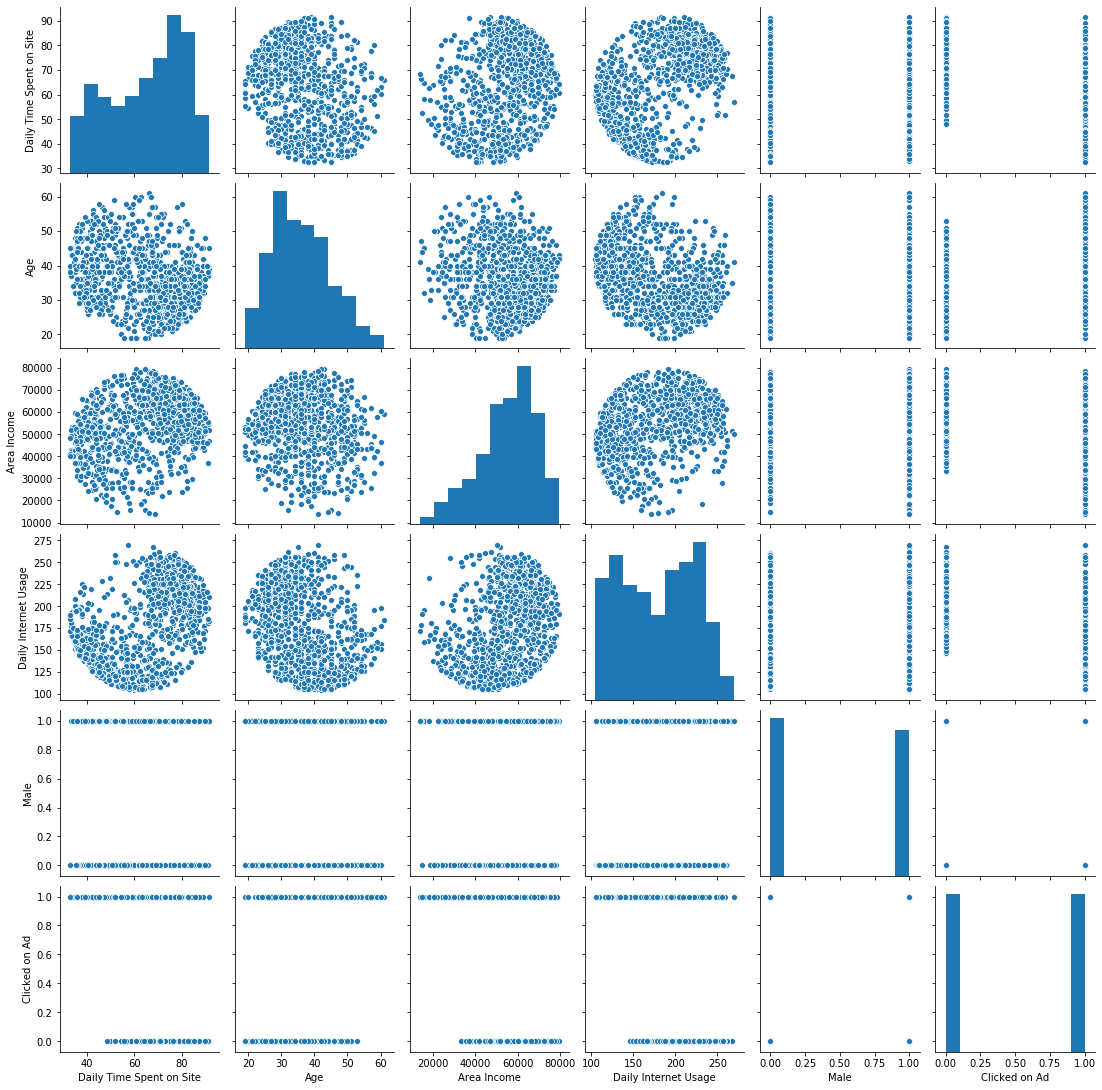

In [7]:
sns.pairplot(df,palette='viridis')

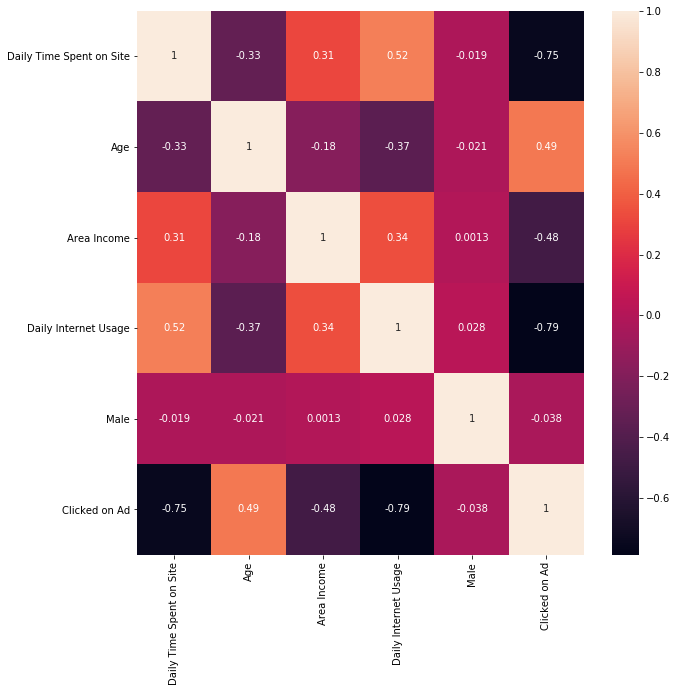

In [8]:
#Visualzing the heatmap for the correlated data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [9]:
#Removing irrelevant columns
df = df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 1)

**2.Splitting features and labels**

In [10]:
X = df.drop(['Clicked on Ad'], axis = 1).values
#target variable
y = df['Clicked on Ad'].values

**3.Splitting the data into train and test data**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101,stratify=y)

In [12]:
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

**4. Implementing ANN Classifier using Keras**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
X_train.shape

(700, 5)

In [15]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

###Final layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
3/3 [==============================] - 1s 181ms/step - loss: 0.6838 - val_loss: 0.6723
Epoch 2/25
3/3 [==============================] - 0s 33ms/step - loss: 0.6705 - val_loss: 0.6585
Epoch 3/25
3/3 [==============================] - 0s 33ms/step - loss: 0.6570 - val_loss: 0.6447
Epoch 4/25
3/3 [==============================] - 0s 33ms/step - loss: 0.6492 - val_loss: 0.6304
Epoch 5/25
3/3 [==============================] - 0s 37ms/step - loss: 0.6331 - val_loss: 0.6149
Epoch 6/25
3/3 [==============================] - 0s 53ms/step - loss: 0.6169 - val_loss: 0.5980
Epoch 7/25
3/3 [==============================] - 0s 75ms/step - loss: 0.6055 - val_loss: 0.5796
Epoch 8/25
3/3 [==============================] - 0s 42ms/step - loss: 0.5900 - val_loss: 0.5597
Epoch 9/25
3/3 [==============================] - 0s 45ms/step - loss: 0.5637 - val_loss: 0.5387
Epoch 10/25
3/3 [==============================] - 0s 65ms/step - loss: 0.5493 - val_loss: 0.5167
Epoch 11/25
3/3 [===========

In [17]:
#Saving the model
from tensorflow.keras.models import load_model
model.save("ANN_model.h5")

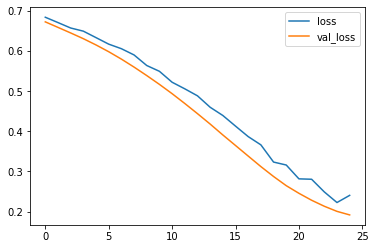

In [18]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [19]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


**5. Calculating the accuracy measures**

In [20]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,predictions))
print("\n")
print("Classification Report : \n")
print(classification_report(y_test,predictions))

Confusion Matrix : 

[[148   2]
 [ 12 138]]


Classification Report : 

              precision    recall  f1-score   support

           0       0.93      0.99      0.95       150
           1       0.99      0.92      0.95       150

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
print("The MSE is : ", mean_squared_error(y_test,predictions))
print("\n")
print("The MAE is : ", mean_absolute_error(y_test,predictions))
print("\n")
print("The Variance is : ",explained_variance_score(y_test,predictions))

The MSE is :  0.04666666666666667


The MAE is :  0.04666666666666667


The Variance is :  0.8177777777777778
